### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pima = pd.read_csv('datasets_228_482_diabetes.csv')

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


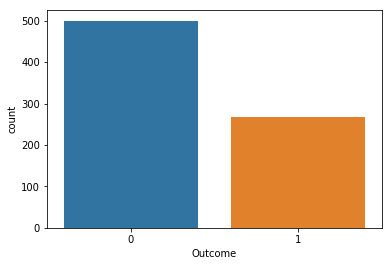

In [6]:
sns.countplot(x='Outcome',data=pima)

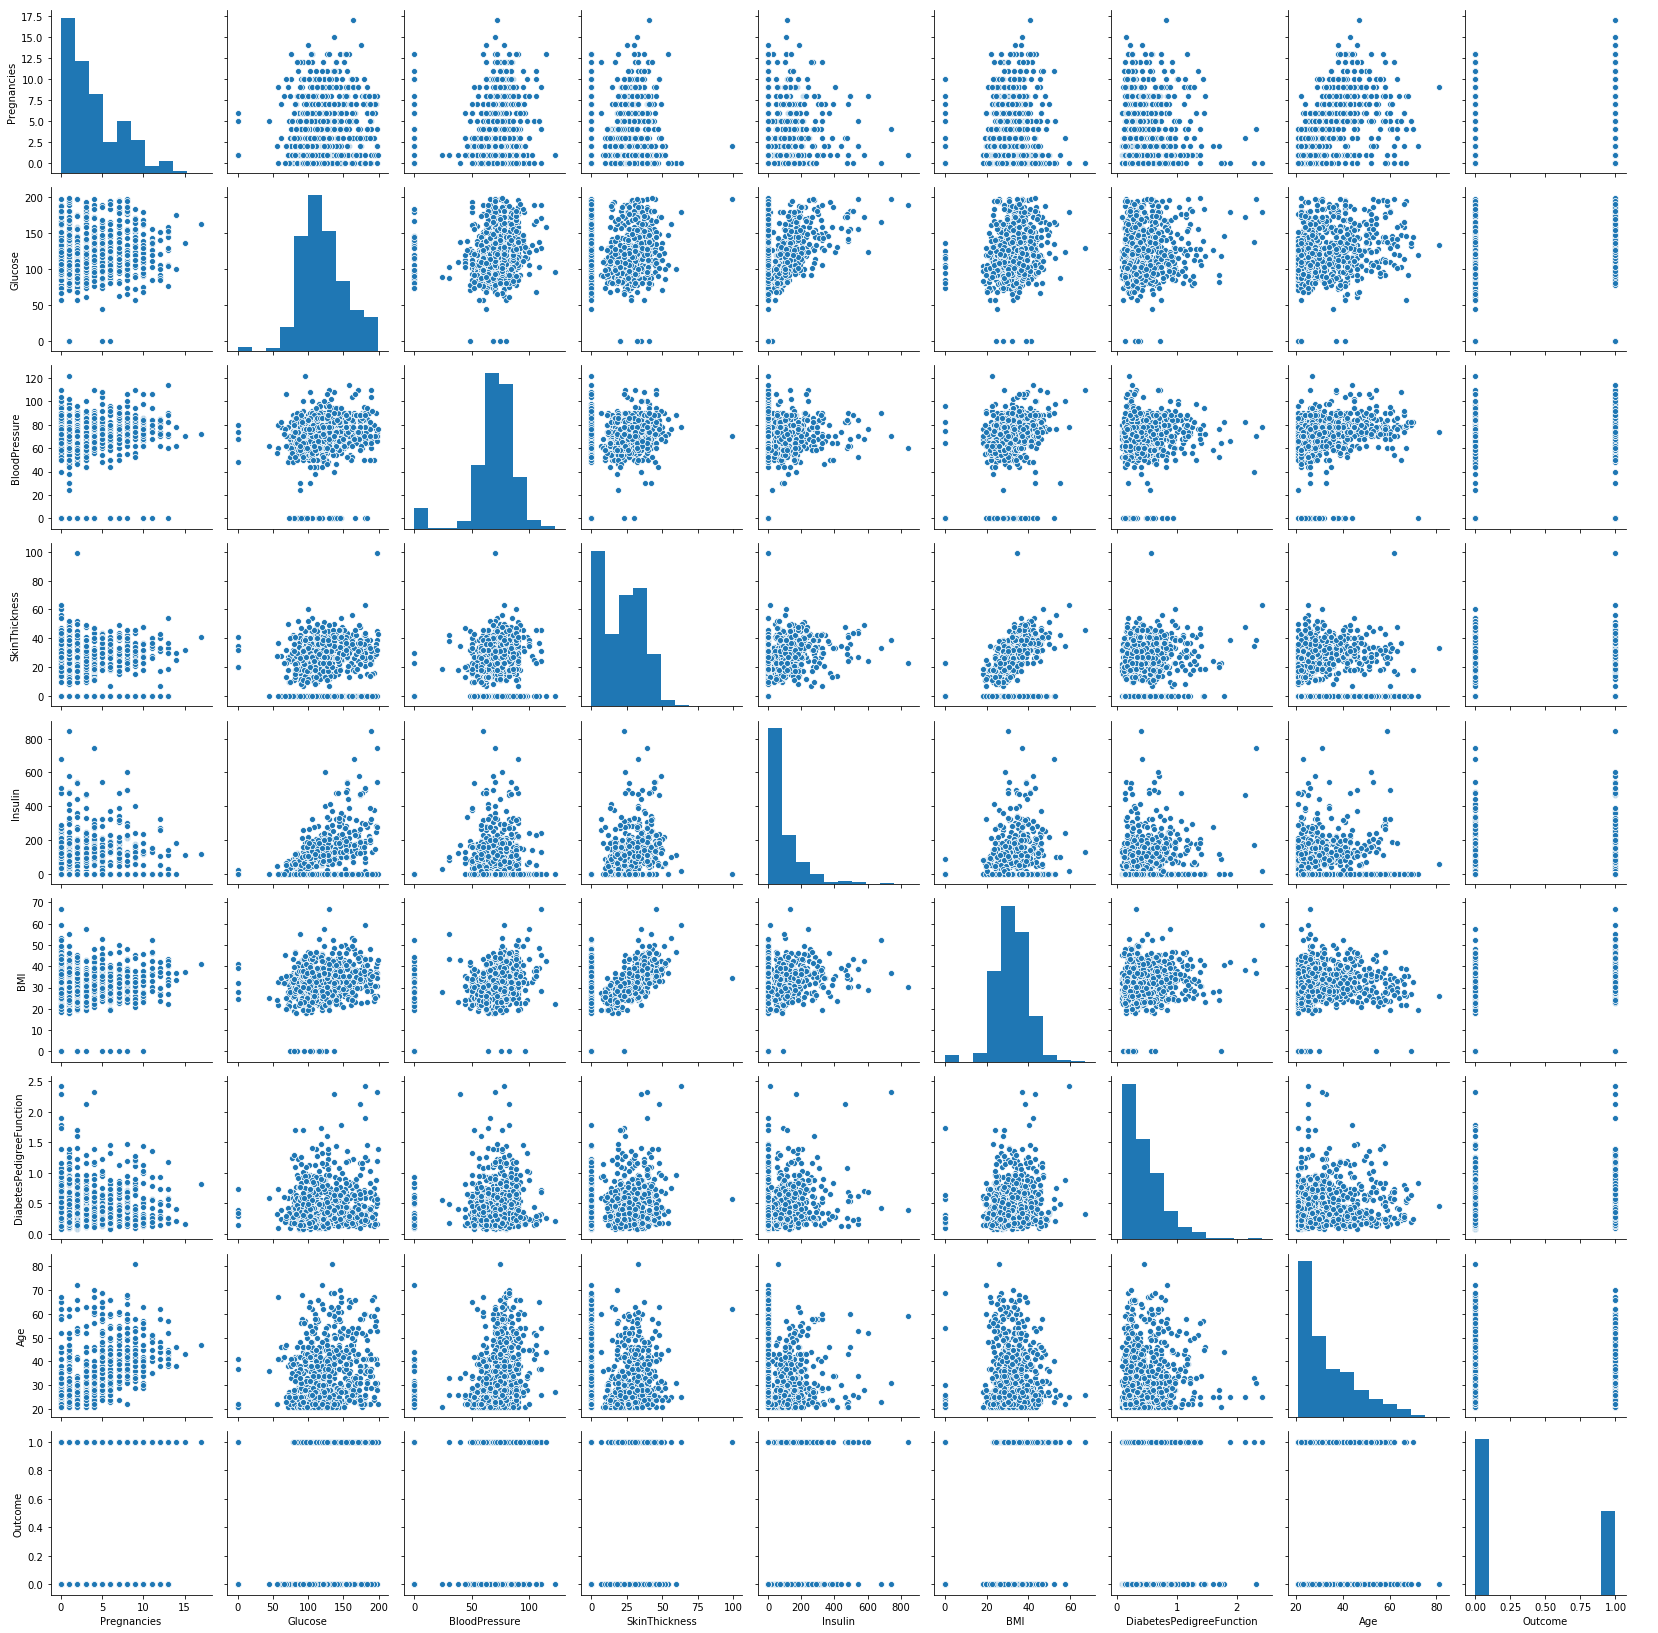

In [7]:
sns.pairplot(pima)

In [8]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


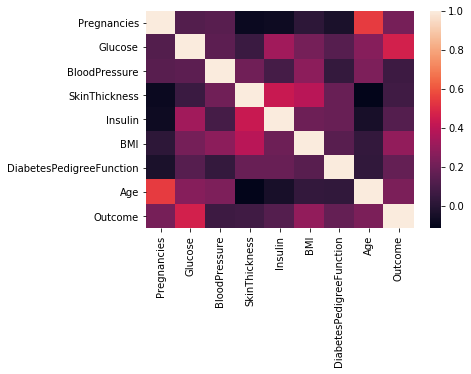

In [11]:
sns.heatmap(pima.corr())

In [13]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
import pandas_profiling

C:\Users\Akshara\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Akshara\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Akshara\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Akshara\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Akshara\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Akshara\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "

In [16]:
pandas_profiling.ProfileReport(pima)

Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.1 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [18]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
pima.shape

(768, 9)

In [20]:
pima1 = pima[:700]
validation = pima[700:]

In [21]:
pima1.shape,validation.shape

((700, 9), (68, 9))

In [22]:
X = pima1.drop('Outcome',axis=1)
y = pima1['Outcome']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()

In [27]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
log.intercept_

array([-5.45928603])

In [29]:
log.coef_

array([[ 1.37666737e-01,  2.60336234e-02, -1.71955031e-02,
         2.69222586e-04, -2.97064794e-04,  5.09865412e-02,
         8.92979299e-01,  6.59892080e-03]])

In [30]:
predict = log.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.7571428571428571
             precision    recall  f1-score   support

          0       0.80      0.84      0.82        92
          1       0.66      0.60      0.63        48

avg / total       0.75      0.76      0.75       140

[[77 15]
 [19 29]]


In [37]:
#to change decision boundary to 0.6 from default value 0.5
prediction_proba = log.predict_proba(X_test)

In [39]:
predict1 = np.where(prediction_proba[:,1]>0.6,1,0)

In [41]:
predict1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [42]:
print(accuracy_score(y_test,predict1))
print(classification_report(y_test,predict1))
print(confusion_matrix(y_test,predict1))

0.7714285714285715
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        92
          1       0.75      0.50      0.60        48

avg / total       0.77      0.77      0.76       140

[[84  8]
 [24 24]]


In [43]:
 validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
700,2,122,76,27,200,35.9,0.483,26,0
701,6,125,78,31,0,27.6,0.565,49,1
702,1,168,88,29,0,35.0,0.905,52,1
703,2,129,0,0,0,38.5,0.304,41,0
704,4,110,76,20,100,28.4,0.118,27,0
705,6,80,80,36,0,39.8,0.177,28,0
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
708,9,164,78,0,0,32.8,0.148,45,1
709,2,93,64,32,160,38.0,0.674,23,1


In [44]:
validation_test = validation.drop('Outcome',axis=1)
validation_y = validation['Outcome']

In [45]:
predict_valid=log.predict(validation_test)

In [47]:
print(accuracy_score(validation_y,predict_valid))
print(classification_report(validation_y,predict_valid))
print(confusion_matrix(validation_y,predict_valid))

0.7941176470588235
             precision    recall  f1-score   support

          0       0.76      0.95      0.85        41
          1       0.88      0.56      0.68        27

avg / total       0.81      0.79      0.78        68

[[39  2]
 [12 15]]
